In [1]:
import pyart
import os
import numpy as np
from matplotlib import pyplot as plt
import netCDF4
from scipy import ndimage, signal, integrate, interpolate
import time
import copy
import platform
my_system = platform.system()
import imp
kazr_tools = imp.load_source('kazr_tools', '/Users/scollis/projects/kazr_tools/code/kazr_tools.py')

%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [3]:
indir = '/data/radar/oli_kazr/'
all_files = os.listdir(indir)
ge_files = []
md_files = []
pr_files = []
all_files.sort()
for fn in all_files:
    if 'olikazrmdM1' in fn:
        md_files.append(fn)
    elif 'olikazrgeM1' in fn:
        ge_files.append(fn)
    elif 'olikazrprM1' in fn:
        pr_files.append(fn)


In [6]:
pr_files.sort()
md_files.sort()
ge_files.sort()
for i in range(len(pr_files)):
    print(pr_files[i], ge_files[i], md_files[i])

olikazrprM1.a1.20170201.000000.nc olikazrgeM1.a1.20160620.000001.nc olikazrmdM1.a1.20160715.005038.nc
olikazrprM1.a1.20170202.000000.nc olikazrgeM1.a1.20160628.000000.nc olikazrmdM1.a1.20170201.000001.nc
olikazrprM1.a1.20170203.000001.nc olikazrgeM1.a1.20160630.000000.nc olikazrmdM1.a1.20170202.000001.nc
olikazrprM1.a1.20170204.000000.nc olikazrgeM1.a1.20170201.000001.nc olikazrmdM1.a1.20170203.000000.nc
olikazrprM1.a1.20170205.000000.nc olikazrgeM1.a1.20170202.000001.nc olikazrmdM1.a1.20170204.000001.nc
olikazrprM1.a1.20170206.000001.nc olikazrgeM1.a1.20170203.000000.nc olikazrmdM1.a1.20170205.000001.nc
olikazrprM1.a1.20170207.000001.nc olikazrgeM1.a1.20170204.000001.nc olikazrmdM1.a1.20170206.000000.nc


In [7]:
pr_fn = os.path.join(indir, pr_files[3])
ge_fn = os.path.join(indir, ge_files[6])
md_fn = os.path.join(indir, md_files[4])
print(pr_fn, ge_fn, md_fn)

/data/radar/oli_kazr/olikazrprM1.a1.20170204.000000.nc /data/radar/oli_kazr/olikazrgeM1.a1.20170204.000001.nc /data/radar/oli_kazr/olikazrmdM1.a1.20170204.000001.nc


In [8]:
radar_md = pyart.io.read(md_fn)
radar_ge = pyart.io.read(ge_fn)
radar_pr = pyart.io.read(pr_fn)

In [9]:
toa_bg_md =  kazr_tools.snr_toa(radar_md)
all_mean_md =  kazr_tools.mean_snr(radar_md)
ns_md, ms_md, mb_md = kazr_tools.describe_radar(radar_md)


1444.4809980392456


In [10]:
toa_bg_ge =  kazr_tools.snr_toa(radar_ge)
all_mean_ge =  kazr_tools.mean_snr(radar_ge)
ns_ge, ms_ge, mb_ge = kazr_tools.describe_radar(radar_ge)


1518.934653043747


In [11]:
toa_bg_pr =  kazr_tools.snr_toa(radar_pr)
all_mean_pr =  kazr_tools.mean_snr(radar_pr)
ns_pr, ms_pr, mb_pr = kazr_tools.describe_radar(radar_pr)


5694.506956100464


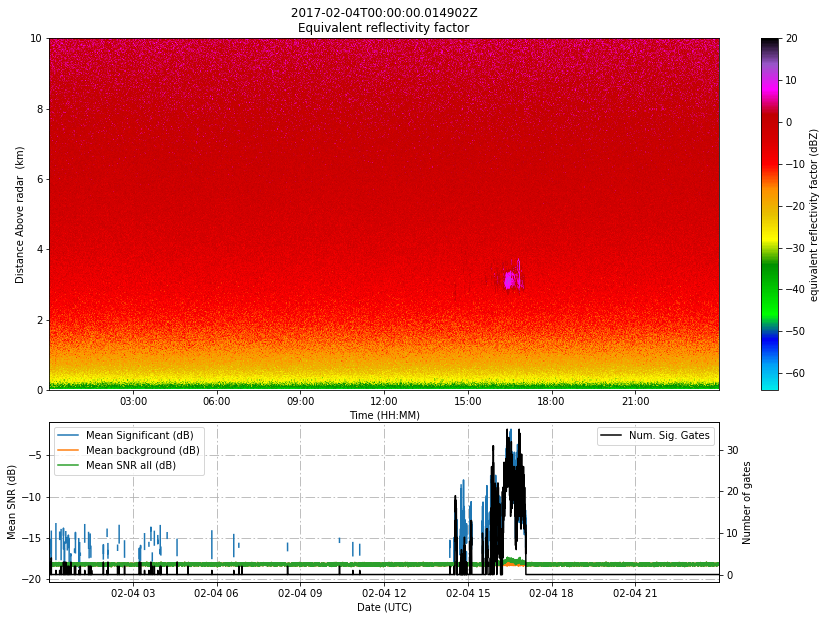

In [46]:
time_pr = netCDF4.num2date(radar_pr.time['data'], radar_pr.time['units'])
my_display = pyart.graph.RadarDisplay(radar_pr)
fig = plt.figure(figsize = [15,10])
ax1 = plt.subplot2grid((3,1), (0,0), rowspan = 2)
ax2 = plt.subplot2grid((3,1), (2,0))
my_display.plot_vpt('reflectivity', vmin=-64, 
                    vmax=20, time_axis_flag=True,
                   ax = ax1)
ax1.set_ylim([0,10.0])
ax2.plot(time_pr, ms_pr, label='Mean Significant (dB)')
ax2.plot(time_pr, mb_pr, label='Mean background (dB)')
ax2.plot(time_pr, all_mean_pr, label='Mean SNR all (dB)')
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')
plt.legend(loc=2)
ax3 = ax2.twinx()
ax3.plot(time_pr, ns_pr, 'k-', label='Num. Sig. Gates')
plt.ylabel('Number of gates')
ax = ax2
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.legend(loc=1)
#plt.ylim([-24,-20])

pos1 = ax1.get_position() # get the original position 
pos2 = ax2.get_position()
pos3 = [pos2.x0 , pos2.y0 ,  pos1.width , pos2.height ] 
ax2.set_position(pos3) # set a new position
ax3.set_position(pos3)
ax2.set_xlim([time_pr.min(), time_pr.max()])
ax3.set_xlim([time_pr.min(), time_pr.max()])
plt.savefig('../images/precip_mode.png')


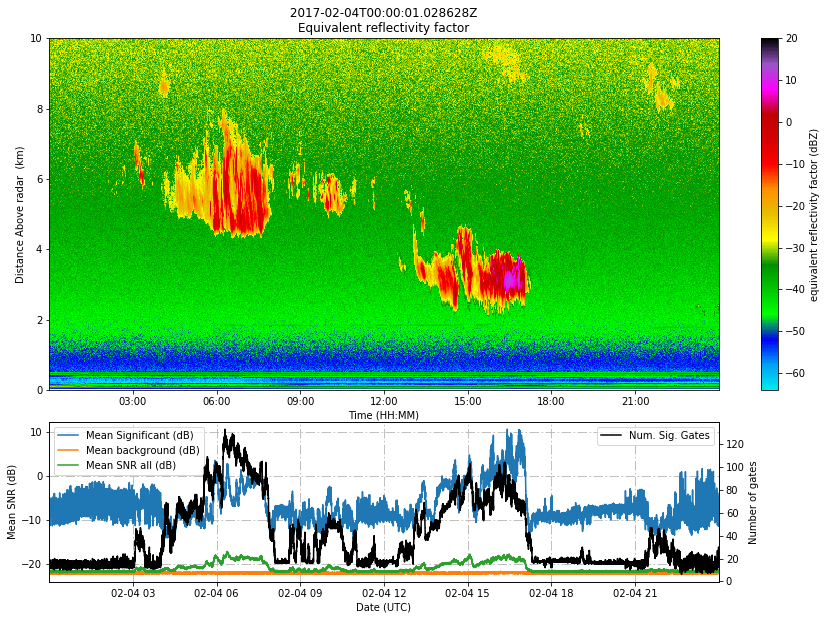

In [47]:
time_ge = netCDF4.num2date(radar_ge.time['data'], radar_ge.time['units'])
my_display = pyart.graph.RadarDisplay(radar_ge)
fig = plt.figure(figsize = [15,10])
ax1 = plt.subplot2grid((3,1), (0,0), rowspan = 2)
ax2 = plt.subplot2grid((3,1), (2,0))
my_display.plot_vpt('reflectivity', vmin=-64, 
                    vmax=20, time_axis_flag=True,
                   ax = ax1)
ax1.set_ylim([0,10.0])
ax2.plot(time_ge, ms_ge, label='Mean Significant (dB)')
ax2.plot(time_ge, mb_ge, label='Mean background (dB)')
ax2.plot(time_ge, all_mean_ge, label='Mean SNR all (dB)')
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')
plt.legend(loc=2)
ax3 = ax2.twinx()
ax3.plot(time_ge, ns_ge, 'k-', label='Num. Sig. Gates')
plt.ylabel('Number of gates')
ax = ax2
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.legend(loc=1)
#plt.ylim([-24,-20])

pos1 = ax1.get_position() # get the original position 
pos2 = ax2.get_position()
pos3 = [pos2.x0 , pos2.y0 ,  pos1.width , pos2.height ] 
ax2.set_position(pos3) # set a new position
ax3.set_position(pos3)
ax2.set_xlim([time_ge.min(), time_ge.max()])
ax3.set_xlim([time_ge.min(), time_ge.max()])
plt.savefig('../images/general_mode.png')



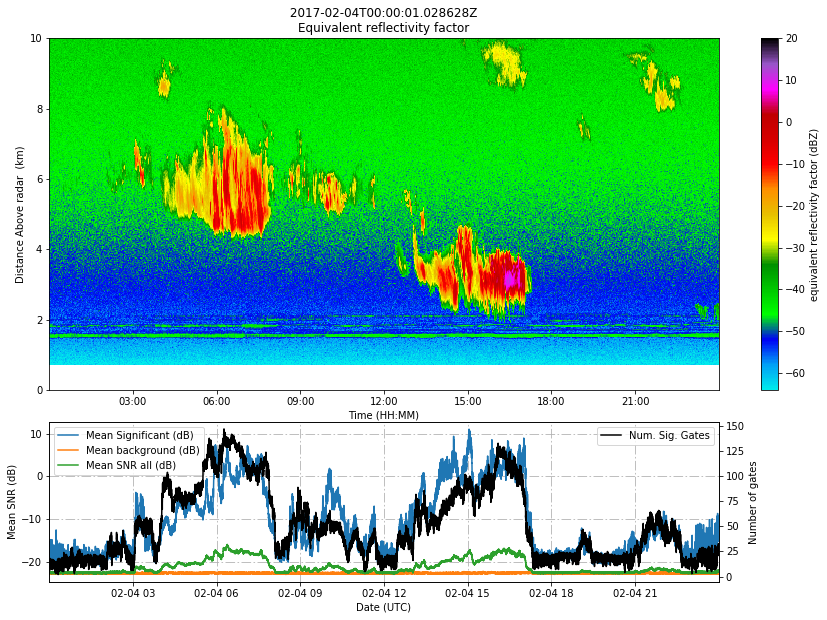

In [48]:
time_md = netCDF4.num2date(radar_md.time['data'], radar_md.time['units'])
my_display = pyart.graph.RadarDisplay(radar_md)
fig = plt.figure(figsize = [15,10])
ax1 = plt.subplot2grid((3,1), (0,0), rowspan = 2)
ax2 = plt.subplot2grid((3,1), (2,0))
my_display.plot_vpt('reflectivity', vmin=-64, 
                    vmax=20, time_axis_flag=True,
                   ax = ax1)
ax1.set_ylim([0,10.0])
ax2.plot(time_md, ms_md, label='Mean Significant (dB)')
ax2.plot(time_md, mb_md, label='Mean background (dB)')
ax2.plot(time_md, all_mean_md, label='Mean SNR all (dB)')
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')
plt.legend(loc=2)
ax3 = ax2.twinx()
ax3.plot(time_md, ns_md, 'k-', label='Num. Sig. Gates')
plt.ylabel('Number of gates')
ax = ax2
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.legend(loc=1)
#plt.ylim([-24,-20])

pos1 = ax1.get_position() # get the original position 
pos2 = ax2.get_position()
pos3 = [pos2.x0 , pos2.y0 ,  pos1.width , pos2.height ] 
ax2.set_position(pos3) # set a new position
ax3.set_position(pos3)
ax2.set_xlim([time_md.min(), time_md.max()])
ax3.set_xlim([time_md.min(), time_md.max()])
plt.savefig('../images/sensitive_mode.png')



In [20]:
def add_filtered(radar):
    sig_dec = pyart.correct.GateFilter(radar)
    sig_dec.exclude_all()
    sig_dec.include_below('velocity_texture', 1.5)
    z_data = copy.deepcopy(radar.fields['reflectivity']['data'])
    z_data_filt = np.ma.masked_where(sig_dec.gate_excluded, z_data)
    radar.add_field_like('reflectivity', 'reflectivity_filtered', z_data_filt,
                         replace_existing = True)

In [22]:
add_filtered(radar_md)
add_filtered(radar_ge)
add_filtered(radar_pr)


In [37]:
def cond_mean(radar, field):
    field_data = radar.fields[field]['data']
    ranger = radar.range['data']
    mean_data = field_data.mean(axis=0)
    return ranger, mean_data

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx


In [28]:
range_md, mean_z_md = cond_mean(radar_md, 'reflectivity_filtered')
range_pr, mean_z_pr = cond_mean(radar_pr, 'reflectivity_filtered')
range_ge, mean_z_ge = cond_mean(radar_ge, 'reflectivity_filtered')


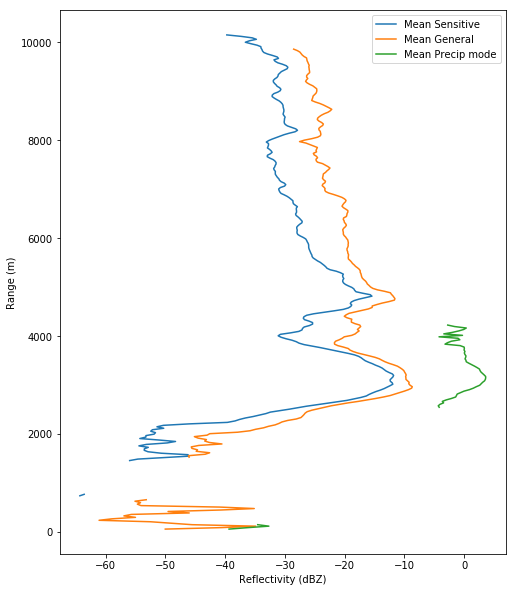

In [49]:
fig = plt.figure(figsize=[8,10])
plt.plot(mean_z_md, range_md, label='Mean Sensitive')
plt.plot(mean_z_ge, range_ge, label='Mean General')
plt.plot(mean_z_pr, range_pr, label='Mean Precip mode')
plt.xlabel('Reflectivity (dBZ)')
plt.ylabel('Range (m)')
plt.legend()
plt.savefig('../images/means.png')


In [51]:
#time we want
target_datetime = netCDF4.datetime(2017,2,4,16,30)
target_time_md = netCDF4.date2num(target_datetime, units = radar_md.time['units'])
print(target_time_md)
idx_md = find_nearest(radar_md.time['data'], target_time_md)
print(idx_md, radar_md.time['data'][idx_md])
print(time_md[idx_md])

target_time_ge = netCDF4.date2num(target_datetime, units = radar_ge.time['units'])
print(target_time_ge)
idx_ge = find_nearest(radar_ge.time['data'], target_time_ge)
print(idx_ge, radar_ge.time['data'][idx_ge])
print(time_ge[idx_ge])

target_time_pr = netCDF4.date2num(target_datetime, units = radar_pr.time['units'])
print(target_time_pr)
idx_pr = find_nearest(radar_pr.time['data'], target_time_pr)
print(idx_pr, radar_pr.time['data'][idx_pr])
print(time_pr[idx_pr])

#needs to go in a function

sweet_pr = radar_pr.fields['reflectivity_filtered']['data'][idx_pr,:]
sweet_ge = radar_ge.fields['reflectivity_filtered']['data'][idx_ge,:]
sweet_md = radar_md.fields['reflectivity_filtered']['data'][idx_md,:]



59400.0
29294 59399.238323
2017-02-04 16:29:59.238323
59400.0
29294 59399.238323
2017-02-04 16:29:59.238323
59400.0
29295 59400.252083
2017-02-04 16:30:00.252083


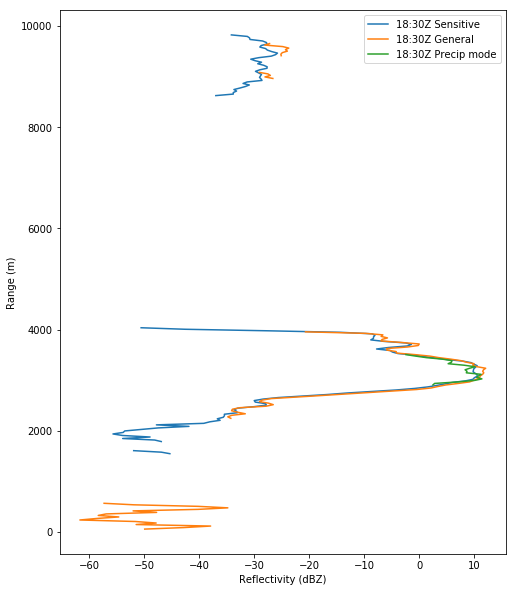

In [53]:
fig = plt.figure(figsize=[8,10])
plt.plot(sweet_md, range_md, label='18:30Z Sensitive')
plt.plot(sweet_ge, range_ge, label='18:30Z General')
plt.plot(sweet_pr, range_pr, label='18:30Z Precip mode')
plt.xlabel('Reflectivity (dBZ)')
plt.ylabel('Range (m)')
plt.legend()
plt.savefig('../images/sweet_1830.png')


In [17]:
pyart.io.write_cfradial('/data/radar/oli_kazr/oli_ge_example.nc', radar_ge)
pyart.io.write_cfradial('/data/radar/oli_kazr/oli_md_example.nc', radar_md)
pyart.io.write_cfradial('/data/radar/oli_kazr/oli_pr_example.nc', radar_pr)



In [54]:
print(radar_md.fields.keys())

dict_keys(['velocity_texture', 'snr_xpol', 'spectral_width', 'reflectivity', 'reflectivity_filtered', 'snr_copol', 'mean_doppler_velocity', 'linear_depolarization_ratio', 'co_to_crosspol_correlation_coeff'])


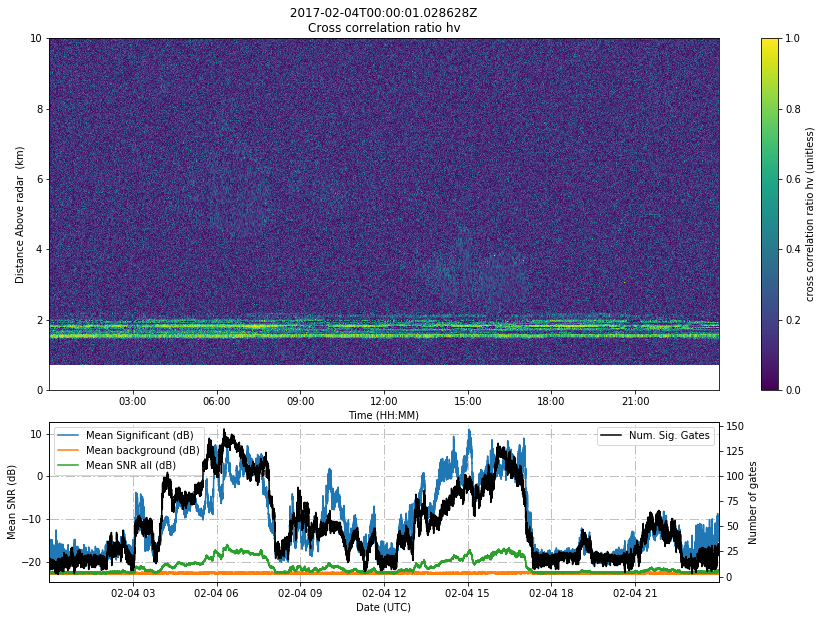

In [55]:
time_md = netCDF4.num2date(radar_md.time['data'], radar_md.time['units'])
my_display = pyart.graph.RadarDisplay(radar_md)
fig = plt.figure(figsize = [15,10])
ax1 = plt.subplot2grid((3,1), (0,0), rowspan = 2)
ax2 = plt.subplot2grid((3,1), (2,0))
my_display.plot_vpt('co_to_crosspol_correlation_coeff', vmin=0, 
                    vmax=1, time_axis_flag=True,
                   ax = ax1)
ax1.set_ylim([0,10.0])
ax2.plot(time_md, ms_md, label='Mean Significant (dB)')
ax2.plot(time_md, mb_md, label='Mean background (dB)')
ax2.plot(time_md, all_mean_md, label='Mean SNR all (dB)')
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')
plt.legend(loc=2)
ax3 = ax2.twinx()
ax3.plot(time_md, ns_md, 'k-', label='Num. Sig. Gates')
plt.ylabel('Number of gates')
ax = ax2
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.legend(loc=1)
#plt.ylim([-24,-20])

pos1 = ax1.get_position() # get the original position 
pos2 = ax2.get_position()
pos3 = [pos2.x0 , pos2.y0 ,  pos1.width , pos2.height ] 
ax2.set_position(pos3) # set a new position
ax3.set_position(pos3)
ax2.set_xlim([time_md.min(), time_md.max()])
ax3.set_xlim([time_md.min(), time_md.max()])
plt.savefig('../images/sensitive_mode_corl.png')


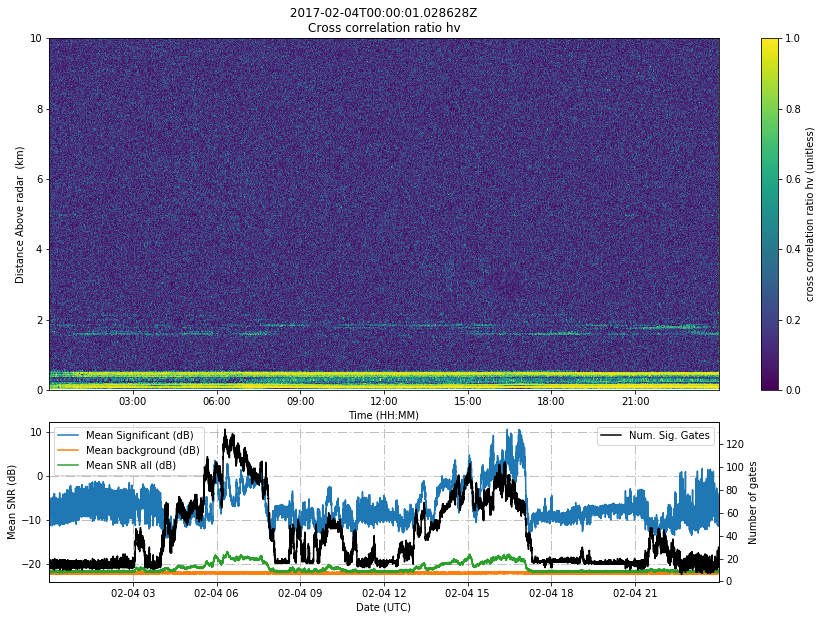

In [56]:
time_ge = netCDF4.num2date(radar_ge.time['data'], radar_ge.time['units'])
my_display = pyart.graph.RadarDisplay(radar_ge)
fig = plt.figure(figsize = [15,10])
ax1 = plt.subplot2grid((3,1), (0,0), rowspan = 2)
ax2 = plt.subplot2grid((3,1), (2,0))
my_display.plot_vpt('co_to_crosspol_correlation_coeff', vmin=0, 
                    vmax=1, time_axis_flag=True,
                   ax = ax1)
ax1.set_ylim([0,10.0])
ax2.plot(time_ge, ms_ge, label='Mean Significant (dB)')
ax2.plot(time_ge, mb_ge, label='Mean background (dB)')
ax2.plot(time_ge, all_mean_ge, label='Mean SNR all (dB)')
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')
plt.legend(loc=2)
ax3 = ax2.twinx()
ax3.plot(time_ge, ns_ge, 'k-', label='Num. Sig. Gates')
plt.ylabel('Number of gates')
ax = ax2
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.legend(loc=1)
#plt.ylim([-24,-20])

pos1 = ax1.get_position() # get the original position 
pos2 = ax2.get_position()
pos3 = [pos2.x0 , pos2.y0 ,  pos1.width , pos2.height ] 
ax2.set_position(pos3) # set a new position
ax3.set_position(pos3)
ax2.set_xlim([time_ge.min(), time_ge.max()])
ax3.set_xlim([time_ge.min(), time_ge.max()])
plt.savefig('../images/general_mode_corrl.png')



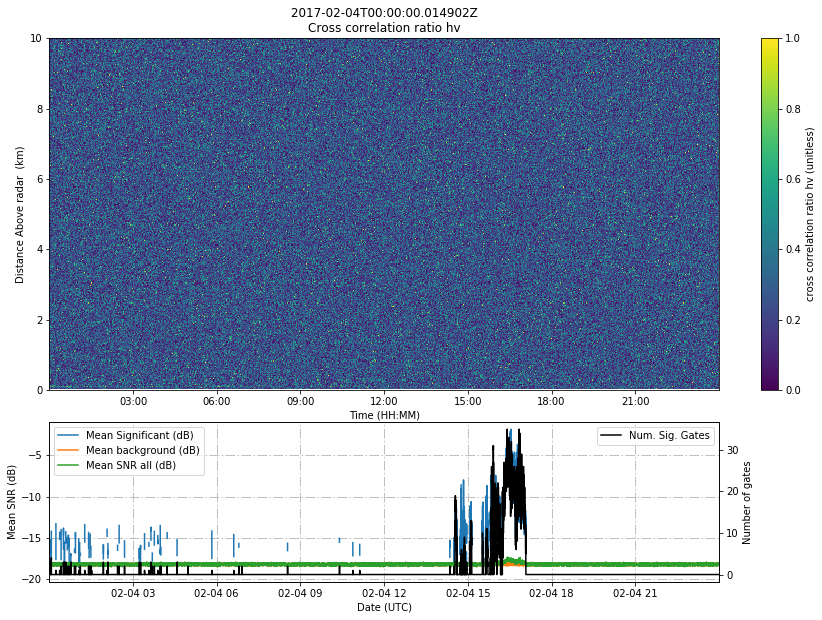

In [57]:
time_pr = netCDF4.num2date(radar_pr.time['data'], radar_pr.time['units'])
my_display = pyart.graph.RadarDisplay(radar_pr)
fig = plt.figure(figsize = [15,10])
ax1 = plt.subplot2grid((3,1), (0,0), rowspan = 2)
ax2 = plt.subplot2grid((3,1), (2,0))
my_display.plot_vpt('co_to_crosspol_correlation_coeff', vmin=0, 
                    vmax=1, time_axis_flag=True,
                   ax = ax1)
ax1.set_ylim([0,10.0])
ax2.plot(time_pr, ms_pr, label='Mean Significant (dB)')
ax2.plot(time_pr, mb_pr, label='Mean background (dB)')
ax2.plot(time_pr, all_mean_pr, label='Mean SNR all (dB)')
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')
plt.legend(loc=2)
ax3 = ax2.twinx()
ax3.plot(time_pr, ns_pr, 'k-', label='Num. Sig. Gates')
plt.ylabel('Number of gates')
ax = ax2
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.legend(loc=1)
#plt.ylim([-24,-20])

pos1 = ax1.get_position() # get the original position 
pos2 = ax2.get_position()
pos3 = [pos2.x0 , pos2.y0 ,  pos1.width , pos2.height ] 
ax2.set_position(pos3) # set a new position
ax3.set_position(pos3)
ax2.set_xlim([time_pr.min(), time_pr.max()])
ax3.set_xlim([time_pr.min(), time_pr.max()])
plt.savefig('../images/precip_mode_corrl.png')
